In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from persistence import *

In [9]:
# Load your data into a numpy array

data = np.genfromtxt("/home/elkzak/BA-Trees/src/resources/datasets/FICO/FICO.train1.csv", delimiter=",")
data = data[1:]





In [10]:
# Split your data into training and testing sets
X_train, y_train = data[:, :-1], data[:, -1]

# Train a random forest model on your training data
rf = classifier_from_file('/home/elkzak/BA-Trees/src/resources/forests/FICO/FICO.RF1.txt',X_train,y_train)
dt = classifier_from_file('/home/elkzak/BA-Trees/src/output/FICO/FICO.BA1.D3.tree',X_train,y_train)


In [2]:
# Define an example instance and its original class label
def generate_vectors_between(arr1, arr2, num_vectors=10):
    new_arr = []
    
    for _ in range(num_vectors):
        vector = []
        for i in range(len(arr1)):
            # Générer une valeur aléatoire entre les éléments correspondants des deux tableaux
            value_between = np.random.uniform(arr1[i], arr2[i])
            vector.append(value_between)
        new_arr.append(vector)
    
    return np.array(new_arr)

# bottom = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])
# top = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])
# set_ = generate_vectors_between(bottom,top,num_vectors=100)
# original_label = rf.predict(top.reshape(1, -1)).ravel()[0]
# predicted_label = dt.predict(top.reshape(1, -1)).ravel()[0]
# print(original_label,predicted_label)
# s=0
# for elt in set_ : 
#   s+=rf.predict(elt.reshape(1, -1)).ravel()[0]-dt.predict(elt.reshape(1, -1)).ravel()[0]
# print(s)



In [3]:
def extract_region(path) :
    Bottomvector = None
    Topvector = None
    with open(path, 'r') as file:
        for line in file:
            if line.startswith('Bottom Vector'):
                vector_str = line.split(':')[1].strip()  # Supprime le "Bottom Vector" et les espaces
                Bottomvector = [float(num) for num in vector_str.split(',')]
            if line.startswith('Top Vector'):
                vector_str = line.split(':')[1].strip()  # Supprime le "Bottom Vector" et les espaces
                Topvector = [float(num) for num in vector_str.split(',')]
                
    if Bottomvector is None :
        print(path,'\n')
    return Bottomvector, Topvector
def extract_time(path) :
    with open(path, 'r') as file:
        line = file.readline().strip()
    cases = line.split(",")
    return cases[10]

In [13]:
datasets = ["Breast-Cancer-Wisconsin","COMPAS-ProPublica","FICO","HTRU2","Pima-Diabetes","Seeds"]
lossDict = dict()
timeDict = dict()
for dataset in datasets :
    timeDict[dataset] = [np.array([k for k in range(3,11)]),np.array([0.0 for k in range(3,11)])]
    for i in range(1,11) :
        path = "/home/elkzak/BA-Trees/src/resources/datasets/" + dataset + "/" + dataset +".train"+str(i)+".csv"
        temp_data = np.genfromtxt(path, delimiter=",")
        temp_data = temp_data[1:]
        temp_X,temp_Y= temp_data[:, :-1], temp_data[:, -1]
        rf_path = '/home/elkzak/BA-Trees/src/resources/forests/'+ dataset + "/" + dataset + ".RF"+str(i)+".txt"
        temp_rf = classifier_from_file(rf_path,temp_X,temp_Y)
        loss = 0
        for j in range(3,11) :
            dt_path = '/home/elkzak/BA-Trees/src/outputGini/'+ dataset + "/" + dataset +".BA"+str(i)+".D"+str(j)+'.tree'
            out_path = '/home/elkzak/BA-Trees/src/outputGini/'+ dataset + "/" + dataset +".BA"+str(i)+".D"+str(j)+'.out'
            temp_dt= classifier_from_file(dt_path,temp_X,temp_Y)
            temp_Bottom,temp_Top = extract_region(dt_path)
            time = extract_time(out_path)
            timeDict[dataset][1][j-3] += float(time) 
            temp_region = generate_vectors_between(temp_Bottom,temp_Top,num_vectors=50)
            for elt in temp_region : 
                loss+=temp_rf.predict(elt.reshape(1, -1)).ravel()[0]-temp_dt.predict(elt.reshape(1, -1)).ravel()[0]
            loss /= 50
        loss/=8
        lossDict[dataset+str(i)] = loss
    timeDict[dataset][1] = (timeDict[dataset][1]/10.0).astype(float)
for elt in lossDict : 
    print(elt, " : ", lossDict[elt],'\n')

Breast-Cancer-Wisconsin1  :  -1.00000048e-06 

Breast-Cancer-Wisconsin2  :  -0.00255 

Breast-Cancer-Wisconsin3  :  0.0 

Breast-Cancer-Wisconsin4  :  0.0 

Breast-Cancer-Wisconsin5  :  0.0 

Breast-Cancer-Wisconsin6  :  0.0 

Breast-Cancer-Wisconsin7  :  -0.005051 

Breast-Cancer-Wisconsin8  :  0.0 

Breast-Cancer-Wisconsin9  :  0.0 

Breast-Cancer-Wisconsin10  :  0.0 

COMPAS-ProPublica1  :  0.0 

COMPAS-ProPublica2  :  0.0 

COMPAS-ProPublica3  :  0.0 

COMPAS-ProPublica4  :  0.0 

COMPAS-ProPublica5  :  0.0 

COMPAS-ProPublica6  :  0.0 

COMPAS-ProPublica7  :  0.0 

COMPAS-ProPublica8  :  0.0 

COMPAS-ProPublica9  :  0.0 

COMPAS-ProPublica10  :  0.0 

FICO1  :  0.0 

FICO2  :  0.0 

FICO3  :  0.0 

FICO4  :  0.0 

FICO5  :  0.0 

FICO6  :  0.0 

FICO7  :  0.0 

FICO8  :  0.0 

FICO9  :  0.0 

FICO10  :  0.0 

HTRU21  :  0.0 

HTRU22  :  0.0 

HTRU23  :  0.0 

HTRU24  :  0.0 

HTRU25  :  0.0 

HTRU26  :  0.0 

HTRU27  :  0.0 

HTRU28  :  0.0 

HTRU29  :  0.0 

HTRU210  :  0.0 

Pim

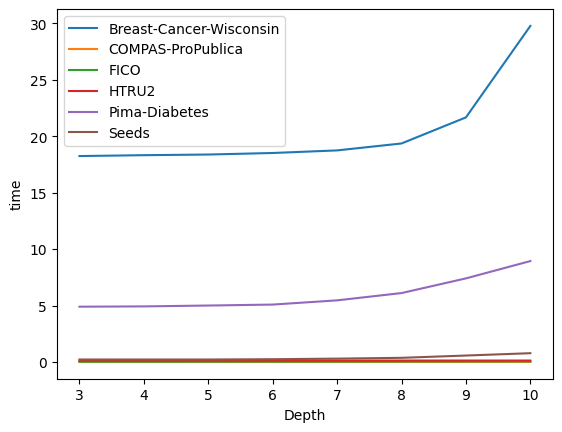

In [14]:
for dataset in datasets:
    plt.plot(timeDict[dataset][0],timeDict[dataset][1],label=dataset)
plt.legend()
plt.xlabel('Depth')
plt.ylabel('time')
plt.show()